In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('./test_images/rand2.jpg')
img.shape

(168, 300, 3)

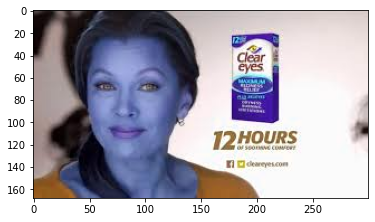

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(168, 300)

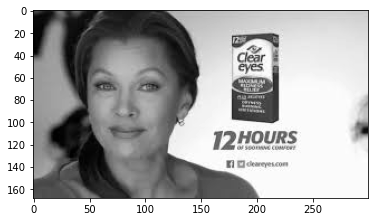

In [5]:
plt.imshow(gray,cmap='gray')

In [6]:

face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[35, 32, 97, 97]], dtype=int32)

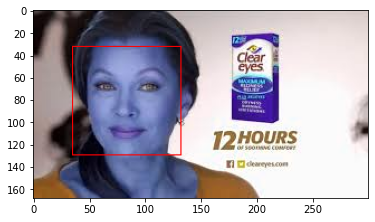

In [7]:
(x,y,w,h) = faces[0]
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0))
plt.imshow(face_img)

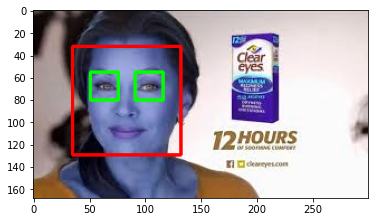

In [8]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

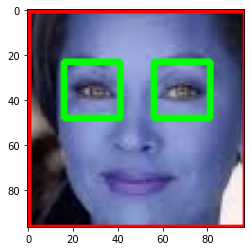

In [9]:
plt.imshow(roi_color , cmap='gray')

In [10]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


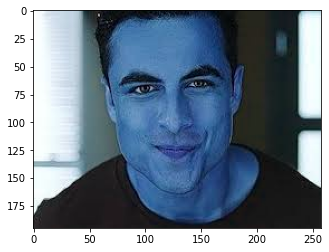

In [11]:
original_image = cv2.imread('./test_images/test9.jpg')
plt.imshow(original_image)

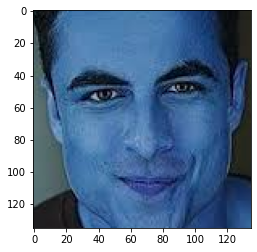

In [12]:

cropped_image = get_cropped_image_if_2_eyes('./test_images/test9.jpg') 
plt.imshow(cropped_image)

In [13]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./dataset/cropped',
 './dataset/jenniferlopez',
 './dataset/markzuckerburg',
 './dataset/michelleobama',
 './dataset/vladimirputin',
 './dataset/willsmith']

In [14]:

import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)
cropped_image_dirs = []
celebrity_file_names_dict = {}

In [15]:


for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
jenniferlopez
Generating cropped images in folder:  ./dataset/cropped/jenniferlopez
markzuckerburg
Generating cropped images in folder:  ./dataset/cropped/markzuckerburg
michelleobama
Generating cropped images in folder:  ./dataset/cropped/michelleobama
vladimirputin
Generating cropped images in folder:  ./dataset/cropped/vladimirputin
willsmith
Generating cropped images in folder:  ./dataset/cropped/willsmith


In [20]:


import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

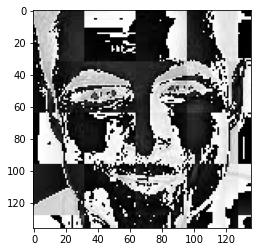

In [23]:
plt.imshow(cropped_image)
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [25]:
celebrity_file_names_dict

{'cropped': [],
 'jenniferlopez': ['./dataset/cropped/jenniferlopez/jenniferlopez1.png',
  './dataset/cropped/jenniferlopez/jenniferlopez2.png',
  './dataset/cropped/jenniferlopez/jenniferlopez3.png',
  './dataset/cropped/jenniferlopez/jenniferlopez4.png',
  './dataset/cropped/jenniferlopez/jenniferlopez5.png',
  './dataset/cropped/jenniferlopez/jenniferlopez6.png',
  './dataset/cropped/jenniferlopez/jenniferlopez7.png',
  './dataset/cropped/jenniferlopez/jenniferlopez8.png',
  './dataset/cropped/jenniferlopez/jenniferlopez9.png',
  './dataset/cropped/jenniferlopez/jenniferlopez10.png',
  './dataset/cropped/jenniferlopez/jenniferlopez11.png',
  './dataset/cropped/jenniferlopez/jenniferlopez12.png',
  './dataset/cropped/jenniferlopez/jenniferlopez13.png',
  './dataset/cropped/jenniferlopez/jenniferlopez14.png',
  './dataset/cropped/jenniferlopez/jenniferlopez15.png',
  './dataset/cropped/jenniferlopez/jenniferlopez16.png',
  './dataset/cropped/jenniferlopez/jenniferlopez17.png',
  './da

In [26]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    if(celebrity_name != 'cropped'):
     class_dict[celebrity_name] = count
     count = count + 1
class_dict

{'jenniferlopez': 0,
 'markzuckerburg': 1,
 'michelleobama': 2,
 'vladimirputin': 3,
 'willsmith': 4}

In [27]:

X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if(img is None):
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [29]:
len(X[0])

4096

In [30]:
X[0]

array([[165],
       [162],
       [151],
       ...,
       [ 61],
       [ 72],
       [205]], dtype=uint8)

In [31]:
y[0]

0

In [32]:

X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(354, 4096)

In [33]:
X[0]

array([165., 162., 151., ...,  61.,  72., 205.])

In [37]:

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8876404494382022

In [39]:
len(X_test)

89

In [40]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.92      0.88      0.90        25
           2       0.80      0.92      0.86        13
           3       0.88      0.83      0.86        18
           4       0.88      0.88      0.88        17

    accuracy                           0.89        89
   macro avg       0.88      0.89      0.89        89
weighted avg       0.89      0.89      0.89        89



In [41]:

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [43]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [44]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score  \
0                  svm    0.913208   
1        random_forest    0.671698   
2  logistic_regression    0.924528   

                                    best_params  
0        {'svc__C': 1, 'svc__kernel': 'linear'}  
1  {'randomforestclassifier__n_estimators': 10}  
2                  {'logisticregression__C': 1}

In [47]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9213483146067416

In [48]:
best_estimators['random_forest'].score(X_test,y_test)

0.7640449438202247

In [50]:
best_estimators['svm'].score(X_test,y_test)

0.9213483146067416

In [51]:
best_clf = best_estimators['logistic_regression']

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm 

array([[16,  0,  0,  0,  0],
       [ 0, 21,  2,  2,  0],
       [ 1,  0, 12,  0,  0],
       [ 0,  1,  0, 17,  0],
       [ 0,  0,  0,  1, 16]], dtype=int64)

Text(69.0, 0.5, 'Truth')

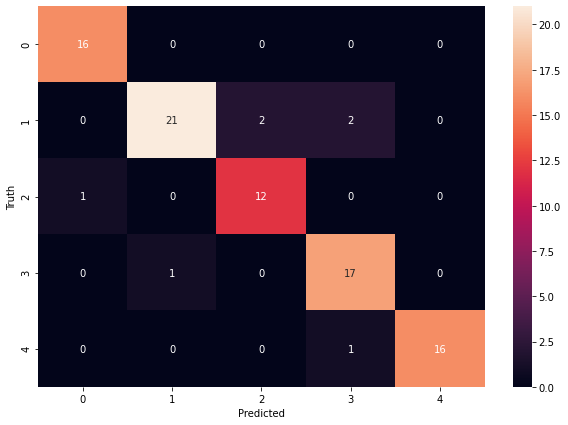

In [53]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [54]:
class_dict 

{'jenniferlopez': 0,
 'markzuckerburg': 1,
 'michelleobama': 2,
 'vladimirputin': 3,
 'willsmith': 4}

In [55]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [56]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))